# DATA CLEANING PROCESS 

In [1]:
#Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

# customer_data

In [60]:
customer_data =pd.read_csv('Customers.csv', encoding = 'latin1')

In [61]:
customer_data

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [62]:
#check data types
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


## Convert to datetime and then format to 'YY/MM/DD'

In [66]:
customer_data['Birthday'] = pd.to_datetime(customer_data['Birthday'], format="%m/%d/%Y", errors='coerce').dt.date



In [67]:
customer_data

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


### check missing values


In [68]:
customer_data.dropna(inplace=True)

In [69]:
customer_data.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

Text(0.5, 1.0, 'counts as per Country')

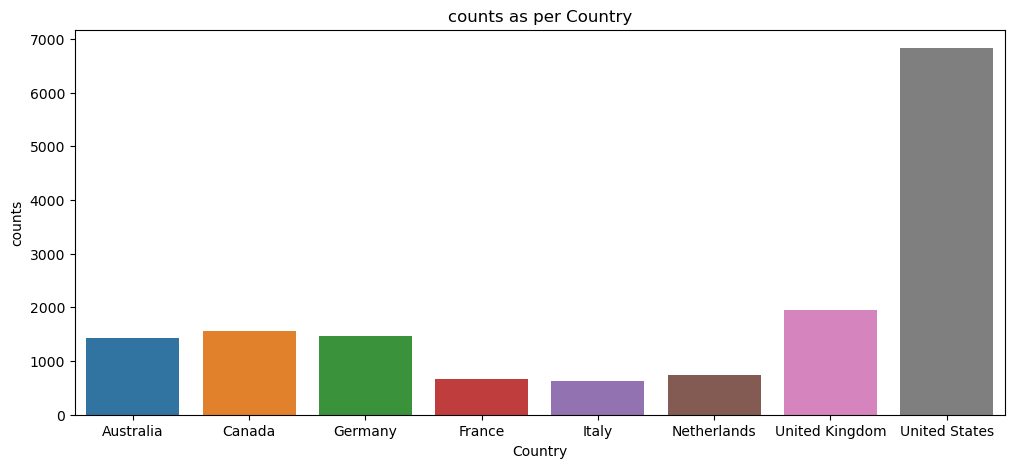

In [9]:
# visualize country counts
plt.figure(figsize=(12,5))
sns.countplot(x=customer_data["Country"], data=customer_data, hue ='Country')
plt.xlabel("Country")
plt.ylabel("counts")
plt.title("counts as per Country")

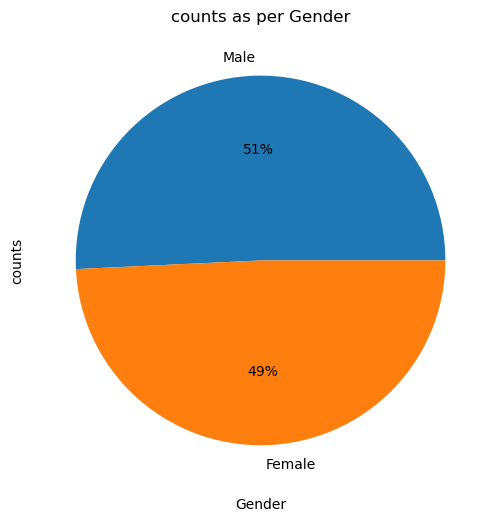

In [10]:
# visualize gender details
plt.figure(figsize=(12,6))
plt.pie(customer_data["Gender"].value_counts(),autopct='%1.0f%%',labels=['Male', 'Female'])
plt.xlabel("Gender")
plt.ylabel("counts")
plt.title("counts as per Gender")
plt.show()

# SALES_DATA

In [11]:
sales_data = pd.read_csv('Sales.csv')

In [12]:
sales_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [13]:
#check data types
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


## Convert to datetime and then format to 'YY/MM/DD'

In [14]:
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'], format="%m/%d/%Y", errors='coerce').dt.date

In [15]:
sales_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,NaN,265598,10,1304,1,CAD
1,366001,1,2016-01-01,1/13/2016,1269051,0,1048,2,USD
2,366001,2,2016-01-01,1/13/2016,1269051,0,2007,1,USD
3,366002,1,2016-01-01,1/12/2016,266019,0,1106,7,CAD
4,366002,2,2016-01-01,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,NaN,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2/23/2021,331277,0,1717,2,CAD


In [16]:
# fill the missing values
sales_data["Delivery Date"]=sales_data["Delivery Date"].fillna(0)

In [17]:
sales_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,0,265598,10,1304,1,CAD
1,366001,1,2016-01-01,1/13/2016,1269051,0,1048,2,USD
2,366001,2,2016-01-01,1/13/2016,1269051,0,2007,1,USD
3,366002,1,2016-01-01,1/12/2016,266019,0,1106,7,CAD
4,366002,2,2016-01-01,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,0,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2/23/2021,331277,0,1717,2,CAD


Text(0.5, 1.0, 'counts as per Currency Code')

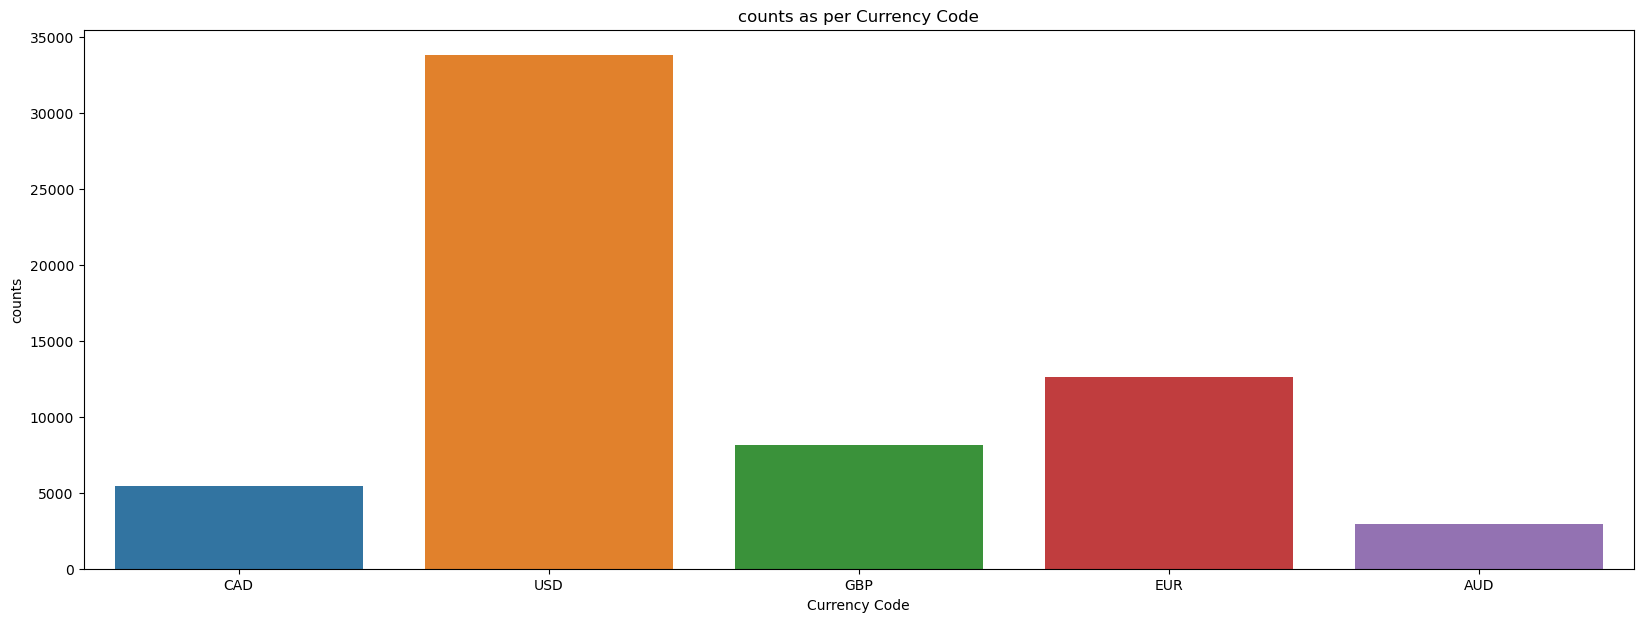

In [18]:
# visualize currency counts
plt.figure(figsize=(20,7))
sns.countplot(x=sales_data["Currency Code"], data=sales_data, hue ='Currency Code')
plt.xlabel("Currency Code")
plt.ylabel("counts")
plt.title("counts as per Currency Code")

# Products_data

In [19]:
products_data = pd.read_csv('Products.csv')

In [20]:
products_data

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [21]:
#check data types
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [22]:
# check missing values
products_data.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

## Convert usd into normal price

In [23]:
products_data["Unit Cost USD"] = products_data["Unit Cost USD"].str.replace("$", "").str.replace(",", "")
products_data["Unit Cost USD"] = products_data["Unit Cost USD"].astype(float)

products_data["Unit Price USD"] = products_data["Unit Price USD"].str.replace("$", "").str.replace(",", "")
products_data["Unit Price USD"] = products_data["Unit Price USD"].astype(float)

In [24]:
products_data

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1.71,3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1.71,3.35,505,Cell phones Accessories,5,Cell phones


In [25]:
product_labels = products_data["Brand"].value_counts().index

In [26]:
product_labels

Index(['Contoso', 'Fabrikam', 'Litware', 'Proseware', 'Adventure Works',
       'Southridge Video', 'Wide World Importers', 'The Phone Company',
       'Tailspin Toys', 'A. Datum', 'Northwind Traders'],
      dtype='object', name='Brand')

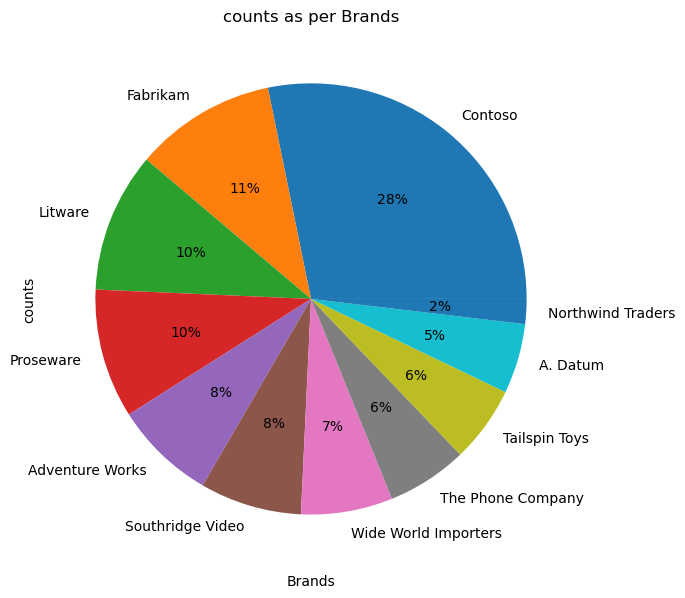

In [27]:
# visualize gender details
plt.figure(figsize=(12,7))
plt.pie(products_data["Brand"].value_counts(),autopct='%1.0f%%',labels=product_labels)
plt.xlabel("Brands")
plt.ylabel("counts")
plt.title("counts as per Brands")
plt.show()

Text(0.5, 1.0, 'counts as per Category')

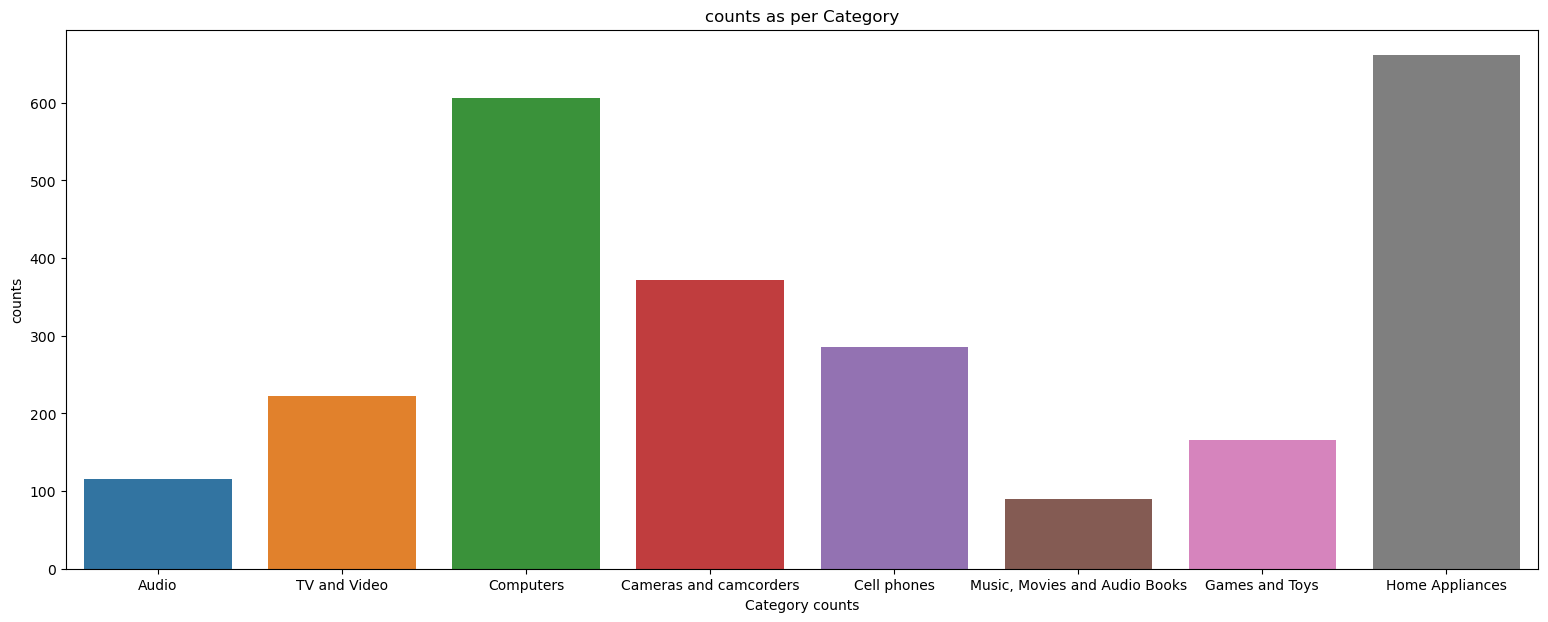

In [28]:
# visualize category counts
plt.figure(figsize=(19,7))
sns.countplot( x = products_data["Category"], data = products_data, hue ='Category')
plt.xlabel("Category counts")
plt.ylabel("counts")
plt.title("counts as per Category")

# STORES_DATA

In [29]:
stores_data = pd.read_csv("Stores.csv")

In [30]:
stores_data

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [31]:
#check data types
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [32]:
# check missing values
stores_data.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

## Convert to datetime and then format to 'YY/MM/DD'

In [33]:
stores_data['Open Date'] = pd.to_datetime(stores_data['Open Date'], format="%m/%d/%Y", errors='coerce').dt.date

In [34]:
stores_data.tail()

,StoreKey,Country,State,Square Meters,Open Date
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01
66,0,Online,Online,NaN,2010-01-01


In [35]:
# fill the missing values
stores_data["Square Meters"]=stores_data["Square Meters"].fillna(0)

In [36]:
stores_data.tail()

,StoreKey,Country,State,Square Meters,Open Date
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01
66,0,Online,Online,0.0,2010-01-01


In [37]:
store_labels = stores_data["State"].value_counts().index

Text(0.5, 1.0, 'counts as per Country')

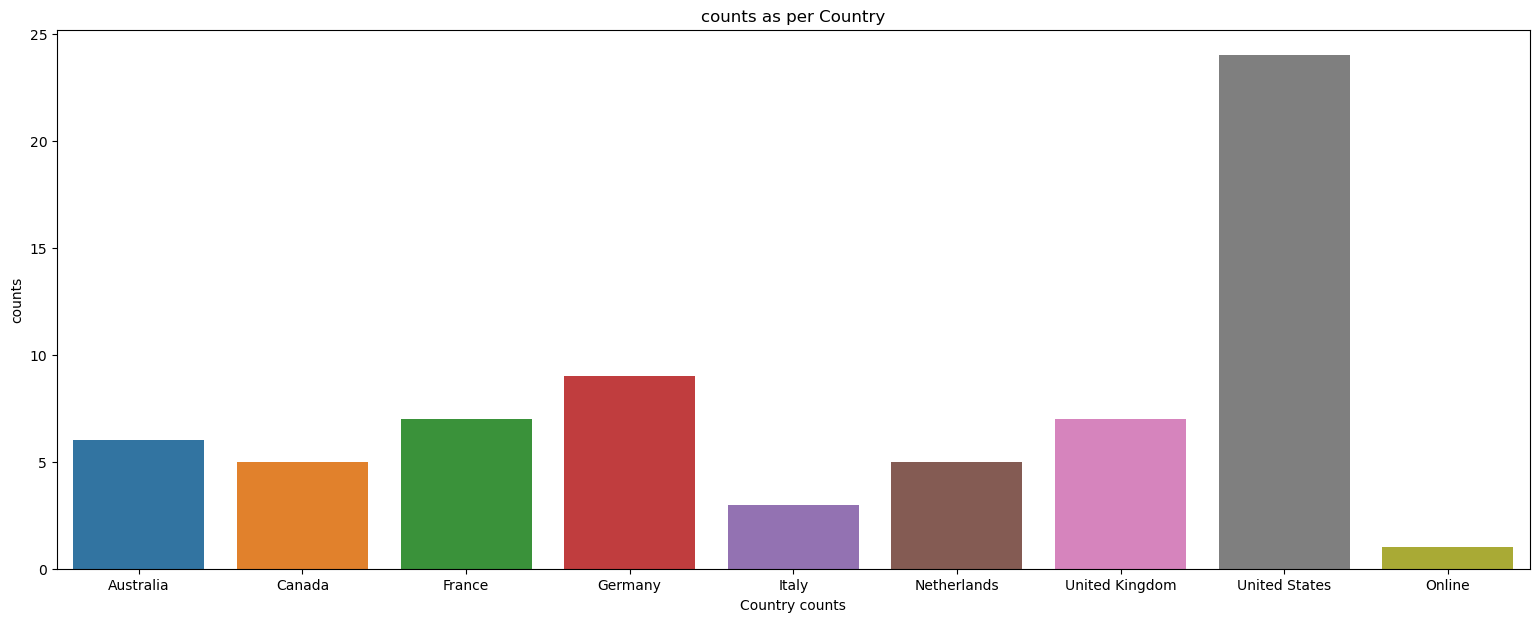

In [38]:
# visualize country counts
plt.figure(figsize=(19,7))
sns.countplot( x = stores_data["Country"], data = stores_data, hue ='Country')
plt.xlabel("Country counts")
plt.ylabel("counts")
plt.title("counts as per Country")



# Exchange_rates_data

In [39]:
Exchange_rates_data = pd.read_csv('Exchange_Rates.csv')

In [40]:
Exchange_rates_data 

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [41]:
Exchange_rates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [42]:
# check missing values
Exchange_rates_data.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [43]:
# rename the column and convert the date format
Exchange_rates_data.rename(columns={"Currency":"Currency Code"},inplace=True)
Exchange_rates_data['Date'] = pd.to_datetime(Exchange_rates_data['Date'], format="%m/%d/%Y", errors='coerce')

In [44]:
Exchange_rates_data

,Date,Currency Code,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415
...,...,...,...
11210,2021-02-20,USD,1.0000
11211,2021-02-20,CAD,1.2610
11212,2021-02-20,AUD,1.2723
11213,2021-02-20,EUR,0.8238


In [45]:
exchange_labels = Exchange_rates_data['Currency Code'].value_counts().index

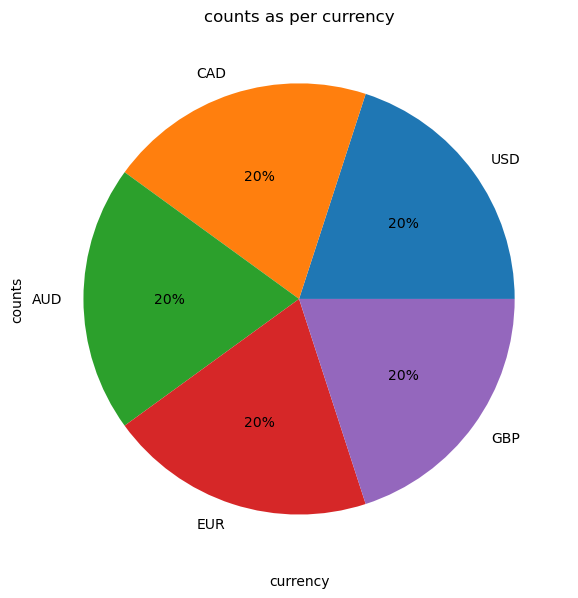

In [46]:
# visualize currency details
plt.figure(figsize=(12,7))
plt.pie(Exchange_rates_data['Currency Code'].value_counts(),autopct='%1.0f%%',labels=exchange_labels)
plt.xlabel("currency")
plt.ylabel("counts")
plt.title("counts as per currency")
plt.show()

# Create the sql database

In [71]:
#sql connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="root",
    database="Dataspark_cap_2")
my_cursor = conn.cursor()
my_cursor.execute("CREATE DATABASE IF NOT EXISTS customer_sales")
print("database created successfully")

database created successfully


## sales table creation

In [78]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS sales_data(
                  Order_Number INT,
                  Line_Item INT,
                  Order_Date DATE,
                  Delivery_Date VARCHAR(255),
                  CustomerKey INT,
                  StoreKey INT,
                  ProductKey INT,
                  Quantity INT,
                  Currency_Code VARCHAR(255)
                  )''')
print("Table Created successfully")

Table Created successfully


In [81]:
#insert values into sales table
insert_query ='''INSERT INTO sales_data(
                  Order_Number,
                  Line_Item,
                  Order_Date,
                  Delivery_Date,
                  CustomerKey,
                  StoreKey,
                  ProductKey,
                  Quantity,
                  Currency_Code)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s,%s)'''
data = sales_data.values.tolist()
my_cursor.executemany(insert_query,data)
# Commit the transaction
conn.commit()
print("Inserted successfully")

Inserted successfully


## customer table creation

In [72]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS customer_data(
                  CustomerKey INT,
                  Gender VARCHAR(255),
                  Name VARCHAR(255),
                  City VARCHAR(255),
                  State_Code VARCHAR(255),
                  State VARCHAR(255),
                  Zip_Code VARCHAR(255),
                  Country VARCHAR(255),
                  Continent VARCHAR(255),
                  Birthday DATE
                  )''')
print("Table Created successfully")

Table Created successfully


In [73]:
# insert values into customer table
insert_query='''INSERT INTO customer_data(
                  CustomerKey,
                  Gender,
                  Name,
                  City,
                  State_Code,
                  State,
                  Zip_Code,
                  Country,
                  Continent,
                  Birthday)
                  VALUES(%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)'''

data = customer_data.values.tolist()
my_cursor.executemany(insert_query,data)

# Commit the transaction
conn.commit()
print("Inserted successfully")

Inserted successfully


# Product Table creation

In [ ]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS product_data(
                  ProductKey INT,
                  Product_Name VARCHAR(255),
                  Brand VARCHAR(255),
                  Color VARCHAR(255),
                  Unit_Cost_USD FLOAT,
                  Unit_Price_USD FLOAT,
                  Subcategorykey int,
                  Subcategory VARCHAR(255),
                  CategoryKey VARCHAR(255),
                  Category VARCHAR(255)
                  )''')
print("Table Created successfully")

In [ ]:
#insert values into Products table
insert_query ='''INSERT INTO product_data(
                  ProductKey,
                  Product_Name,
                  Brand,
                  Color,
                  Unit_Cost_USD,
                  Unit_Price_USD,
                  Subcategorykey,
                  Subcategory,
                  CategoryKey,
                  Category)
                  VALUES (%s, %s, %s, %s, %s, %s, %s, %s,%s,%s)'''
data = products_data.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

# Store Table creation

In [76]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS store_data(
                  StoreKey INT,
                  Country VARCHAR(255),
                  State VARCHAR(255),
                  Square_Meters FLOAT,
                  Open_Date DATE
                  )''')
print("Table Created successfully")

Table Created successfully


In [77]:
#insert values into Store table
insert_query ='''INSERT INTO store_data(
                  StoreKey,
                  Country,
                  State,
                  Square_Meters,
                  Open_Date)
                  VALUES (%s, %s, %s, %s, %s)'''
data = stores_data.values.tolist()
my_cursor.executemany(insert_query,data)
print("Inserted successfully")

Inserted successfully


# Exchange_Rates Table creation

In [74]:
my_cursor.execute('''CREATE TABLE IF NOT EXISTS exchange_data(
                  Date DATE,
                  Currency_Code VARCHAR(255),
                  Exchange FLOAT
                  )''')
print("Table Created successfully")

Table Created successfully


In [75]:
# insert values into exchange table
insert_query ='''INSERT INTO exchange_data(
                  Date,
                  Currency_Code,
                  Exchange)
                  VALUES (%s, %s, %s)'''
data = Exchange_rates_data.values.tolist()
my_cursor.executemany(insert_query,data)

# Commit the transaction
conn.commit()
print("Inserted successfully")

Inserted successfully
